<a href="https://colab.research.google.com/github/KiranJoshi25/X_ray_classification/blob/main/CASEA_Training_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all necessary libraries **


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image


preprocessing Image Data

In [ ]:

train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory('train',
                                          target_size = (600,600),
                                          batch_size = 8,
                                          class_mode ='binary')
Validation_dataset = validation.flow_from_directory('validation',
                                          target_size = (600,600),
                                           batch_size = 8,
                                           class_mode ='binary')

Found 120 images belonging to 2 classes.
Found 28 images belonging to 2 classes.


Setting Labels 

In [ ]:
train_dataset.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Generating Binary class CNN model

In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(600,600,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                   
                                    
                                    
                                    
                                  
                                    tf.keras.layers.Flatten(),

                                    tf.keras.layers.Dense(512,activation='relu'),
                                    tf.keras.layers.Dropout(0.4),
                                    
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    
                                    
                                    ])

Compile model

In [ ]:

from tensorflow.keras import optimizers
model.compile(
              loss='binary_crossentropy', 
              
              optimizer = optimizers.Adam(learning_rate=0.001),
              
              metrics = ['accuracy'])

Training Model

Epoch 1/10
15/15 [==============================] - 64s 4s/step - loss: 2.3938 - accuracy: 0.6583 - val_loss: 0.4046 - val_accuracy: 0.8214
Epoch 2/10
15/15 [==============================] - 6s 385ms/step - loss: 0.3140 - accuracy: 0.8833 - val_loss: 0.3572 - val_accuracy: 0.8571
Epoch 3/10
15/15 [==============================] - 6s 394ms/step - loss: 0.2057 - accuracy: 0.9250 - val_loss: 0.2407 - val_accuracy: 0.9286
Epoch 4/10
15/15 [==============================] - 6s 386ms/step - loss: 0.1770 - accuracy: 0.9250 - val_loss: 0.1374 - val_accuracy: 0.9643
Epoch 5/10
15/15 [==============================] - 6s 391ms/step - loss: 0.1769 - accuracy: 0.9417 - val_loss: 0.1443 - val_accuracy: 0.9643
Epoch 6/10
15/15 [==============================] - 6s 399ms/step - loss: 0.1514 - accuracy: 0.9500 - val_loss: 0.0857 - val_accuracy: 0.9643
Epoch 7/10
15/15 [==============================] - 6s 392ms/step - loss: 0.0529 - accuracy: 0.9833 - val_loss: 0.3165 - val_accuracy: 0.8929
Epoch 8/

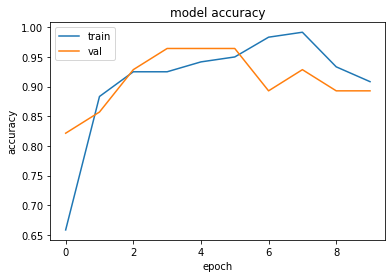

In [ ]:
history = model.fit(train_dataset,steps_per_epoch=15,epochs=10,
                      validation_data = Validation_dataset)

from matplotlib import pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

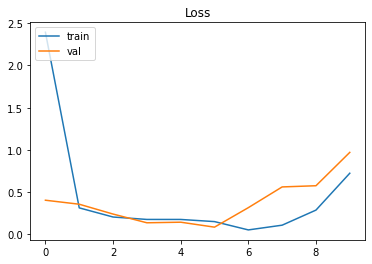

In [ ]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('Loss')

plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model Summary

In [ ]:
Validation_dataset.class_indices
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 598, 598, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 299, 299, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 297, 297, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 148, 148, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 128)     73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 73, 73, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 682112)            0

Testing 

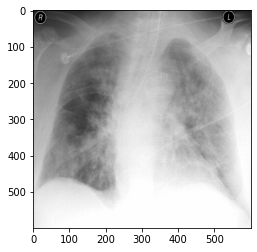

[[1.]]
PNEUMONIA


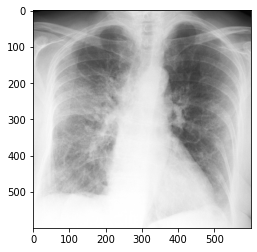

[[1.]]
PNEUMONIA


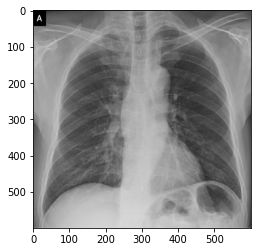

[[1.]]
PNEUMONIA


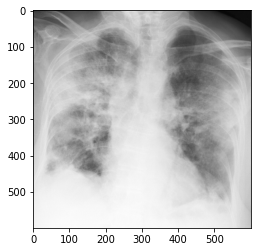

[[1.]]
PNEUMONIA


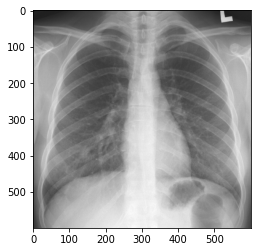

[[1.]]
PNEUMONIA


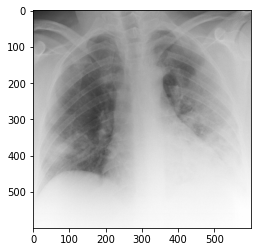

[[1.]]
PNEUMONIA


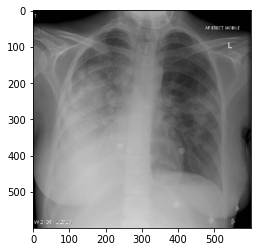

[[1.]]
PNEUMONIA


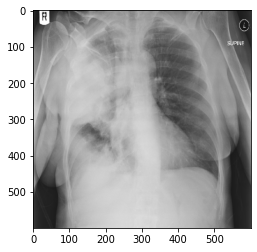

[[1.]]
PNEUMONIA


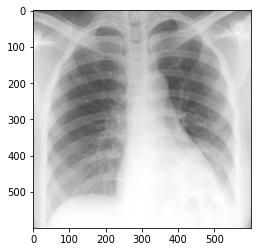

[[1.]]
PNEUMONIA


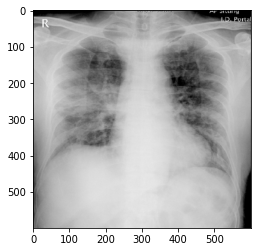

[[1.]]
PNEUMONIA


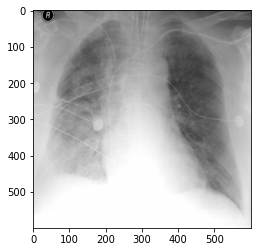

[[1.]]
PNEUMONIA


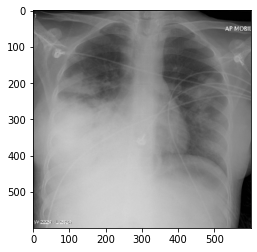

[[1.]]
PNEUMONIA


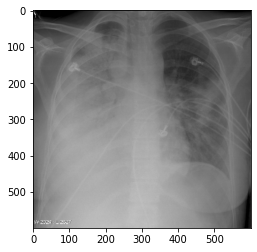

[[1.]]
PNEUMONIA


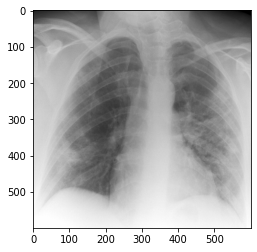

[[1.]]
PNEUMONIA


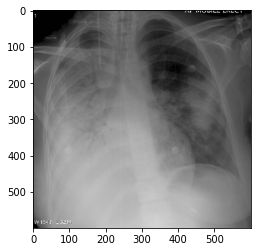

[[1.]]
PNEUMONIA


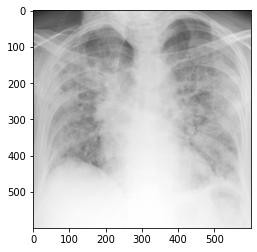

[[1.]]
PNEUMONIA


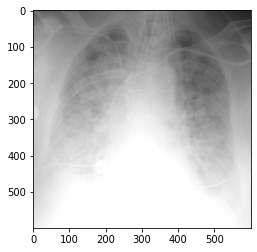

[[1.]]
PNEUMONIA


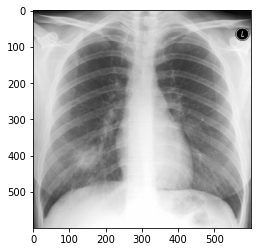

[[1.]]
PNEUMONIA


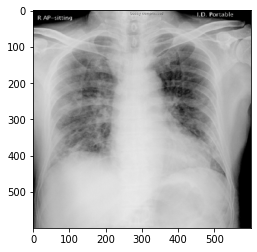

[[1.]]
PNEUMONIA


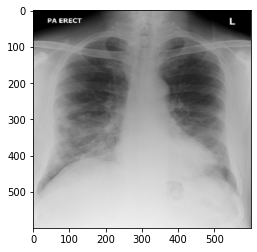

[[1.]]
PNEUMONIA


In [ ]:
dir_path = 'test/TEST'
for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(600,600))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    print(val)
    if (val == 0):
        print("NORMAL")
    else:
        print("PNEUMONIA")

Saving trained Model

In [ ]:
model.save("model_case1")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model_case1/assets


Confusion Matrix

In [ ]:
def image_import (img_path, class_type, appended_list):
    for i in os.listdir(img_path):
        read_path = os.path.join(img_path, i)
       
        img = cv2.imread(read_path)
        img = cv2.resize(img, (600, 600))
        appended_list.append([img, class_type])
        

In [ ]:
#importing pneumonia lung images
img_path = 'test/PNEUMONIA'
testing_data=[]
image_import(img_path, 1, testing_data)

In [ ]:
#import normal lung images
img_path = 'test/NORMAL'
image_import(img_path, 0, testing_data)

In [ ]:
import random
random.shuffle(testing_data)

In [ ]:
#seperate testing to XY
test_features = []
test_targets = []

for f, t in testing_data:
    test_features.append(f)
    test_targets.append(t)

test_features = np.array(test_features).reshape(-1, 600, 600, 3)
test_targets = np.array(test_targets)   
test_features = test_features/255

In [ ]:
#confusion matrix calculation
false_negative = 0
false_positive = 0
true_negative = 0
true_positive = 0

result = model.predict_classes(test_features)
accuracy = model.evaluate(test_features,test_targets)[1]

for i in range(len(test_features)):
    if test_targets[i] == 1:
        if result[i] == 1:
            true_positive += 1
        elif result[i] == 0: 
            false_negative += 1
        else:
            print('class not found')
    if test_targets[i] == 0:
        if result[i] == 1:
            false_positive += 1
        elif result[i] == 0: 
            true_negative += 1
        else:
            print('error class not found')

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
2/2 [==============================] - 0s 20ms/step - loss: 0.1090 - accuracy: 0.9500


In [ ]:
#create confusion matrix data
import pandas as pd

test_result = [false_negative,
               true_negative,
              true_positive,
               false_positive]
adjusted_test_result = np.array(test_result)/(len(test_features))
df_test_result = pd.DataFrame(np.array(['false_negative','true_negative','true_positive','false_positive']),columns=['results'])
df_test_result['percent'] = adjusted_test_result
df_test_result

,results,percent
0,false_negative,0.00
1,true_negative,0.45
2,true_positive,0.50
3,false_positive,0.05


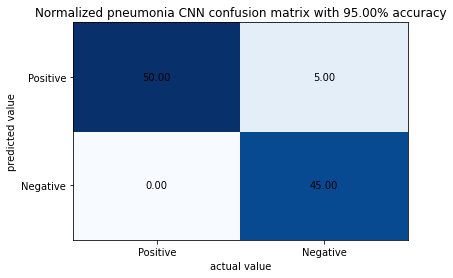

In [ ]:
#confusion matrix plot 
fig,ax = plt.subplots()
heatmap = ax.pcolor((df_test_result['percent'].to_numpy().reshape(2,2)),cmap='Blues')
data = df_test_result['percent'].to_numpy().reshape(2,2)* 100
for y in range(data.shape[0]):
    for x in range(data.shape[1]):
        ax.text(x + 0.5, y + 0.5, '%.2f' % data[y, x],
                 horizontalalignment='center',
                 verticalalignment='center',
                 )
ax.set_xticks([0.5,1.5])
ax.set_yticks([0.5,1.5])
ax.set_xticklabels(['Positive','Negative'])
ax.set_yticklabels(['Negative','Positive'])
plt.xlabel('actual value')
plt.ylabel('predicted value')
plt.title('Normalized pneumonia CNN confusion matrix with %.2f' %(accuracy*100)+ '% accuracy')
plt.savefig('confusion_matrix.png')
plt.show()